Getting started using this brown dwarf metric notebook as a guide: https://github.com/yoachim/LSST-BD-Cadence/blob/main/bd_dist_metric.ipynb

In [1]:
from lsst.sims.maf.metrics.baseMetric import BaseMetric
import lsst.sims.maf.utils as mafUtils
import lsst.sims.utils as utils
from scipy import interpolate

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.io import ascii, fits
import glob

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

In [2]:
from mafContrib.lssmetrics import depthLimitedNumGalMetric
from mafContrib.LSSObsStrategy.galaxyCountsMetric_extended import GalaxyCountsMetric_extended \
    as GalaxyCountsMetric

Make a list of all the OpSim databases by crawling the directories:

In [3]:
dblist = []
glob_dirs17 = glob.glob('/sims_maf/fbs_1.7/*')
for globdir in glob_dirs17:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)
        
glob_dirs171 = glob.glob('/sims_maf/fbs_1.7.1/*')
for globdir in glob_dirs171:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)
        
glob_dirs16 = glob.glob('/sims_maf/fbs_1.6/*')
for globdir in glob_dirs16:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)

glob_dirs15 = glob.glob('/sims_maf/fbs_1.5/*')
for globdir in glob_dirs15:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)

glob_dirs15sso = glob.glob('/sims_maf/fbs_1.5_sso/*')
for globdir in glob_dirs15sso:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)

glob_dirs16sso = glob.glob('/sims_maf/fbs_1.6_sso/*')
for globdir in glob_dirs16sso:
    tmpglob = glob.glob(globdir+'/*.db')
    for dbname in tmpglob:
        dblist.append(dbname)


In [4]:
# dblist

In [5]:
hp.nside2pixarea(32, degrees=True)

3.357174580844667

In [6]:
'''
import os
import run_info as ri
families = ri.FamilyInfo()
allsims = []
for f in families.list_of_families():
    allsims += [s for s in families.family[f]]
allsims

families_we_want = ['visit_time', 'u_long', 'wfd_depth', 'footprint', 'footprint_tune', 'good_seeing']
oursims = []
for f in families_we_want:
    oursims += [s for s in families.family[f]]
oursims

rootdir = '/sims_maf/'
alldbs = glob.glob(os.path.join(rootdir, 'fbs_1.*', '*', '*10yrs.db'))
# alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*visit_time*', '*10yrs.db')))
#alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*baseline*', '*10yrs.db'))[0])
#alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*wfd_depth*', '*10yrs.db'))[0])

alldbs
dblist = [s for s in alldbs if os.path.split(s)[-1].replace('.db', '') in oursims]

dblist.append('/sims_maf/fbs_1.7/baseline/baseline_nexp1_v1.7_10yrs.db')
dblist
'''

"\nimport os\nimport run_info as ri\nfamilies = ri.FamilyInfo()\nallsims = []\nfor f in families.list_of_families():\n    allsims += [s for s in families.family[f]]\nallsims\n\nfamilies_we_want = ['visit_time', 'u_long', 'wfd_depth', 'footprint', 'footprint_tune', 'good_seeing']\noursims = []\nfor f in families_we_want:\n    oursims += [s for s in families.family[f]]\noursims\n\nrootdir = '/sims_maf/'\nalldbs = glob.glob(os.path.join(rootdir, 'fbs_1.*', '*', '*10yrs.db'))\n# alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*visit_time*', '*10yrs.db')))\n#alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*baseline*', '*10yrs.db'))[0])\n#alldbs.append(glob.glob(os.path.join(rootdir, 'fbs_1.*', '*wfd_depth*', '*10yrs.db'))[0])\n\nalldbs\ndblist = [s for s in alldbs if os.path.split(s)[-1].replace('.db', '') in oursims]\n\ndblist.append('/sims_maf/fbs_1.7/baseline/baseline_nexp1_v1.7_10yrs.db')\ndblist\n"

In [7]:
len(dblist)

200

In [8]:
# alldbs

In [9]:
# Set up some parameters to be used for all metric extraction:

nside = 32 # 64
sql = '(filter="g" or filter="i") and fieldDec < -60'
sql_i = 'filter = "i" and fieldDec < -60'
sql_g = 'filter = "g" and fieldDec < -60'
sql_r = 'filter = "r" and fieldDec < -60'


Now loop over all the OpSim databases, using predefined metrics to extract the info we will need. This includes:

- galaxy number counts
- stellar density, with various r-band limits
- coadd M5 in g, r, i

In [10]:
all_bg = []
outDir='temp'
resultsDb = db.ResultsDb(outDir)

for dbname in dblist:
    dbFile = dbname
    runName = dbFile.replace('.db', '')
    conn = db.OpsimDatabase(dbFile)
    # outDir='temp'
    # resultsDb = db.ResultsDb(outDir=outDir)
    bundleList = []
    
    # slicer = slicers.UserPointsSlicer(lv_dat['ra'], lv_dat['dec'])
    slicer = slicers.HealpixSlicer(nside=nside)
    plotDict = {}

    metric_ngal = GalaxyCountsMetric(nside=nside, metricName='numGal')
    bundleList.append(metricBundles.MetricBundle(metric_ngal, slicer, sql_i, plotDict=plotDict,
                                                 runName=runName))

    mafMap = maps.StellarDensityMap()
    #metric_nstar = metrics.StarDensityMetric(rmagLimit=26.865, metricName='nstars_rmag<medianM5')
    #bundleList.append(metricBundles.MetricBundle(metric_nstar,slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))

    metric_nstar24 = metrics.StarDensityMetric(rmagLimit=24, metricName='nstars_rmag<24')
    metric_nstar24p5 = metrics.StarDensityMetric(rmagLimit=24.5, metricName='nstars_rmag<24.5')
    metric_nstar25 = metrics.StarDensityMetric(rmagLimit=25, metricName='nstars_rmag<25')
    metric_nstar25p5 = metrics.StarDensityMetric(rmagLimit=25.5, metricName='nstars_rmag<25.5')
    metric_nstar26 = metrics.StarDensityMetric(rmagLimit=26, metricName='nstars_rmag<26')
    metric_nstar26p5 = metrics.StarDensityMetric(rmagLimit=26.5, metricName='nstars_rmag<26.5')
    metric_nstar27 = metrics.StarDensityMetric(rmagLimit=27, metricName='nstars_rmag<27')
    bundleList.append(metricBundles.MetricBundle(metric_nstar24, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar24p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar25, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar25p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar26, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar26p5, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_nstar27, slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))

    metric_coadd = metrics.Coaddm5Metric()
    bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_i, plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_g, plotDict=plotDict, runName=runName))
    bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_r, plotDict=plotDict, runName=runName))
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()

    all_bg.append(bg)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint (filter="g" or filter="i") and fieldDec < -60 for columns ['fieldDec', 'fieldRA']
Found 33660 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt24_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt24_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt25_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt25_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt26_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt26_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_nstars_rmaglt27_g_or_i_and_fieldDec_lt_-60_HEAL']


/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/baseSpatialSlicer.py:110: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn('Warning:  Loading maps but cache on.'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" and fieldDec < -60 for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth']
Found 13766 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_CoaddM5_g_and_fieldDec_lt_-60_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" and fieldDec < -60 for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth']
Found 19818 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp1_v1_7_10yrs_CoaddM5_r_and_fieldDec_lt_-60_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" and fieldDec < -60 for columns ['fieldDec', 'fieldRA', 'filter', 'fiveSigmaDepth']
Found 19894 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseli

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/maps/dustMap.py:24: UserWarning: Slicer value of nside (32) different from map value (128), using slicer value
  warnings.warn('Slicer value of nside (%i) different from map value (%i), using slicer value'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint (filter="g" or filter="i") and fieldDec < -60 for columns ['fieldDec', 'fieldRA']
Found 32158 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt24_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt24_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt25_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt25_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt26_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt26_5_g_or_i_and_fieldDec_lt_-60_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nex

In [11]:
'''
#first: compute integrated mag in B:
LF = ascii.read('LF_-1.5_10Gyr_B.dat', header_start=12)
mags = LF['magbinc']
counts = LF['Bmag']
intBmag = -2.5*np.log10( np.sum(counts * np.power(10.0,-0.4*mags) ))
print ('intMag='+str(intBmag))
#result is 6.856379, store it for later
'''

# make fake LF for old galaxy of given integrated B, distance modulus mu, in any of filters ugrizY
def makeFakeLF(intB, mu, filtername): 
    if (filtername=='y'): filtername=='Y'
    modelBmag = 6.856379 # integrated B mag of the model LF being read
    LF = ascii.read('LF_-1.5_10Gyr.dat', header_start=12)
    mags = LF['magbinc']
    counts = LF[filtername+'mag']
    # shift model LF to requested distance and dim it
    mags = mags + mu
    modelBmag = modelBmag + mu
    # scale model counts up/down to reach the requested intB
    factor = np.power(10.0,-0.4*(intB-modelBmag))
    counts = factor * counts
    return mags, counts
    
#test: now will make a fake LF for 47Tuc, with intB=5.78, mu0=13.32
#intB=5.78
#mu0=13.32
#LFmags,LFcounts = makeFakeLF(intB,mu0,'r')
#for i in range(len(LFmags)):
#    print (LFmags[i],LFcounts[i])


Create a dictionary of luminosity functions to use as a look-up table.

(Use distance modulus = 0 -- we will apply the distance modulus later.)

In [12]:
lf_dict_i = {}
lf_dict_g = {}
tmp_MB = -10.0

for i in range(131):
    mbkey = f'MB{tmp_MB:.2f}'
    iLFmags,iLFcounts = makeFakeLF(tmp_MB, 0.0, 'i')
    lf_dict_i[mbkey] = (np.array(iLFmags), np.array(iLFcounts))
    gLFmags,gLFcounts = makeFakeLF(tmp_MB, 0.0, 'g')
    lf_dict_g[mbkey] = (np.array(gLFmags), np.array(gLFcounts))
    tmp_MB += 0.1

Create a function that estimates the surface brightness limit based on the following inputs:

- g and i-band M5 limits
- number of stars required for detection, based on a required Poisson S/N factoring in background galaxies and foreground stars
- the distance at which you'd like to detect the dwarf

In [13]:
def sum_luminosity(LFmags, LFcounts):
    magref = LFmags[0]
    totlum = 0.0
    
    for mag, count in zip(LFmags, LFcounts):
        tmpmags = np.repeat(mag, count)
        totlum += np.sum(10.0**((magref - tmpmags)/2.5))

    mtot = magref-2.5*np.log10(totlum)
    return mtot
    
def sblimit(mags_g, mags_i, nstars_req, distlim):
    distance_limit = distlim*1e3 # distance limit in parsecs
    distmod_limit = 5.0*np.log10(distance_limit) - 5.0

    mg_lim = []
    mi_lim = []
    sbg_lim = []
    sbi_lim = []
    flag_lim = []
    
    for glim, ilim, nstars, distmod_lim in zip(mags_g, mags_i, nstars_req, distmod_limit):
    # for i in range(len(mags_g)):
        if (glim > 15) and (ilim > 15):
            # print(glim, ilim, nstars)
            fake_MB = -5.0
            ng = 1e6
            ni = 1e6
    
            while (ng > nstars) and (ni > nstars) and fake_MB<0.25:
                # B_fake = distmod_limit+fake_MB
                mbkey = f'MB{fake_MB:.2f}'
                iLFmags0,iLFcounts0 = lf_dict_i[mbkey]
                gLFmags0,gLFcounts0 = lf_dict_g[mbkey]
                iLFcounts = np.random.poisson(iLFcounts0)
                gLFcounts = np.random.poisson(gLFcounts0)
                iLFmags = iLFmags0+distmod_lim # Add the distance modulus to make it apparent mags
                gLFmags = gLFmags0+distmod_lim # Add the distance modulus to make it apparent mags
                # print(iLFcounts0-iLFcounts)
                gsel = (gLFmags <= glim)
                isel = (iLFmags <= ilim)
                ng = np.sum(gLFcounts[gsel])
                ni = np.sum(iLFcounts[isel])
                # print('fake_MB: ',fake_MB, ' ng: ',ng, ' ni: ', ni, ' nstars: ', nstars)
                fake_MB += 0.1
            
            if fake_MB > -4.9:
                gmag_tot = sum_luminosity(gLFmags[gsel], gLFcounts[gsel]) - distmod_lim
                imag_tot = sum_luminosity(iLFmags[isel], iLFcounts[isel]) - distmod_lim
                # S = m + 2.5logA, where in this case things are in sq. arcmin, so A = 1 arcmin^2 = 3600 arcsec^2
                sbtot_g = distmod_lim + gmag_tot + 2.5*np.log10(3600.0)
                sbtot_i = distmod_lim + imag_tot + 2.5*np.log10(3600.0)
                mg_lim.append(gmag_tot)
                mi_lim.append(imag_tot)
                sbg_lim.append(sbtot_g)
                sbi_lim.append(sbtot_i)
                if (ng < ni):
                    flag_lim.append('g')
                else:
                    flag_lim.append('i')
            else:
                mg_lim.append(999.9)
                mi_lim.append(999.9)
                sbg_lim.append(999.9)
                sbi_lim.append(999.9)
                flag_lim.append('none')
        else:
            mg_lim.append(999.9)
            mi_lim.append(999.9)
            sbg_lim.append(-999.9)
            sbi_lim.append(-999.9)
            flag_lim.append('none')
        
    return mg_lim, mi_lim, sbg_lim, sbi_lim, flag_lim


In [14]:
# Calculate the factor to go from number per healpix to number per square arcminute or per square arcsec
pixarea_deg = hp.nside2pixarea(nside, degrees=True)*(u.degree**2)
pixarea_arcmin = pixarea_deg.to(u.arcmin**2)
pixarea_arcsec = pixarea_deg.to(u.arcsec**2)

# Account for:
#  - cmd_frac: fraction of CMD area being selected
#  - stargal_contamination: what fraction of objects in your "star" selection after star-galaxy separation are background galaxy contaminants?

cmd_frac = 0.1
stargal_contamination = 0.40
nsigma = 10.0


In [26]:
names = []
mg_lims = []
mi_lims = []
mv_lims = []
sb_g_lims = []
sb_i_lims = []
sb_v_lims = []
nbelow_mv_7 = []

# for run in dblist[0:15]:
for ind in range(len(dblist)):
    run = dblist[ind]
    runName = run.replace('.db', '')
    root0 = str.replace(runName, '/', '_')
    root = str.replace(root0, '.', '_')
    bg = all_bg[ind]

    i5 = bg.bundleDict[root+'_CoaddM5_i_and_fieldDec_lt_-60_HEAL'].metricValues
    g5 = bg.bundleDict[root+'_CoaddM5_g_and_fieldDec_lt_-60_HEAL'].metricValues
    r5 = bg.bundleDict[root+'_CoaddM5_r_and_fieldDec_lt_-60_HEAL'].metricValues

    ngal = bg.bundleDict[root+'_numGal_i_and_fieldDec_lt_-60_HEAL'].metricValues
    # nstar = bg.bundleDict[root+'_nstars_rmagltmedianM5_g_or_i_USER'].metricValues
    # Just use the r<27 values for the "total" number of stars:
    nstar = bg.bundleDict[root+'_nstars_rmaglt27_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues

    nstar_r24 = bg.bundleDict[root+'_nstars_rmaglt24_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r24p5 = bg.bundleDict[root+'_nstars_rmaglt24_5_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r25 = bg.bundleDict[root+'_nstars_rmaglt25_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r25p5 = bg.bundleDict[root+'_nstars_rmaglt25_5_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r26 = bg.bundleDict[root+'_nstars_rmaglt26_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r26p5 = bg.bundleDict[root+'_nstars_rmaglt26_5_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues
    nstar_r27 = bg.bundleDict[root+'_nstars_rmaglt27_g_or_i_and_fieldDec_lt_-60_HEAL'].metricValues

    nstar_all = nstar*0.0
    rbinvals = np.arange(24.0, 27.5, 0.5)
    rbinnames = [nstar_r24, nstar_r24p5, nstar_r25, nstar_r25p5, nstar_r26, nstar_r26p5, nstar_r27]

    for binval,bindensity in zip(rbinvals, rbinnames):
        inbin = np.where(np.abs(r5-binval) < 0.25)
        nstar_all[inbin] = bindensity[inbin]

    outside_faint = (r5 >= 27.25)
    outside_bright = (r5 <= 23.75)
    nstar_all[outside_faint] = nstar[outside_faint]
    nstar_all[outside_bright] = nstar_r24[outside_bright]

    # Star density is number of stars per square arcsec. Convert to a total number per healpix, then number per sq. arcmin:
    nstar_all_per_healpix = nstar_all*pixarea_arcsec
    nstar_all_per_arcmin = nstar_all_per_healpix/pixarea_arcmin
    
    # Number of galaxies is the total in each healpix. Convert to number per sq. arcmin:
    ngal_per_arcmin = ngal/pixarea_arcmin

    # Star density is number of stars per square arcsec. Convert to a total number per healpix, then number per sq. arcmin:
    nstar_per_healpix = nstar*pixarea_arcsec
    nstar_per_arcmin = nstar_per_healpix/pixarea_arcmin
    
    # 
    dwarf_distance = 100.0 # in kpc
    # rh_pc = np.random.normal(100, 50, len(g5)) # r_half; centered at 100 pc, FWHM=50 pc
    # rh_pc[(rh_pc <= 0)] = 20.0 # set to 20 pc if it is negative
    rh_pc = np.repeat(100.0, len(g5))
    rh_arcmin = (rh_pc/(dwarf_distance*1e3))*206265.0/60   # 206265"/rad, 60"/arcmin
    area_factor = (rh_arcmin**2)/(1.0**2) # Correct for the r_h size relative to the 1' fiducial; i.e., pi*r^2/pi*1^2
    
    nstars_required = nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination*area_factor)+(nstar_all_per_arcmin*cmd_frac*area_factor))
    # nstars_required = nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination*50)+(nstar_all_per_arcmin*cmd_frac*50))

    mg_lim, mi_lim, sb_g_lim, sb_i_lim, flag_lim = sblimit(g5, i5, nstars_required, distlim=np.repeat(dwarf_distance, len(g5)))

    names.append(run)
    mg_lims.append(mg_lim)
    mi_lims.append(mi_lim)
    sb_g_lims.append(sb_g_lim)
    sb_i_lims.append(sb_i_lim)
    

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/numpy/ma/core.py:1178: RuntimeWarning: invalid value encountered in multiply
  masked_da = umath.multiply(m, da)


In [27]:
mg_medians = []
mi_medians = []
mv_medians = []
sbg_medians = []
sbi_medians = []
sbv_medians = []
nbelow_mv3 = []
fracbelow_mv3 = []
maxdist = []

for mg, mi, sbg, sbi in zip(mg_lims, mi_lims, sb_g_lims, sb_i_lims):
    mg = np.array(mg)
    mi = np.array(mi)
    sbg = np.array(sbg)
    sbi = np.array(sbi)

    okgx = (np.abs(sbi) < 90) & (np.abs(sbg) < 90) & (np.abs(mi) < 90) & (np.abs(mg) < 90)

    # okmg = (np.abs(mg) < 90)
    # print(np.median(mg[okmg]))
    
    # Use the conversion from Appendix A of Komiyama+2018, ApJ, 853, 29:
    # V = g_hsc - 0.371*(gi_hsc)-0.068
    mv = mg-0.371*(mg-mi)-0.068
    sbv = sbg-0.371*(sbg-sbi)-0.068
    
    mg_medians.append(np.median(mg[okgx]))
    mi_medians.append(np.median(mi[okgx]))
    mv_medians.append(np.median(mv[okgx]))
    sbg_medians.append(np.median(sbg[okgx]))
    sbi_medians.append(np.median(sbi[okgx]))
    sbv_medians.append(np.median(sbv[okgx]))
    # maxdist.append(np.max(lv_dat[okgx]['Dist_Mpc']))
    nbelow = np.sum((mv > -2) & (mv < 10))
    nbelow_mv3.append(nbelow)
    fracbelow_mv3.append(nbelow/len(mv[okgx]))

#print(len(lv_dat), len(lv_dat[(mv > -7) & (mv < 0)]))

In [28]:
# Select the "fiducial" visit(s) to be the baseline (nexp2 and nexp1):
name_arr = np.array(names)

fiducial2 = np.where(name_arr == '/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db')
fiducial1 = np.where(name_arr == '/sims_maf/fbs_1.7/baseline/baseline_nexp1_v1.7_10yrs.db')

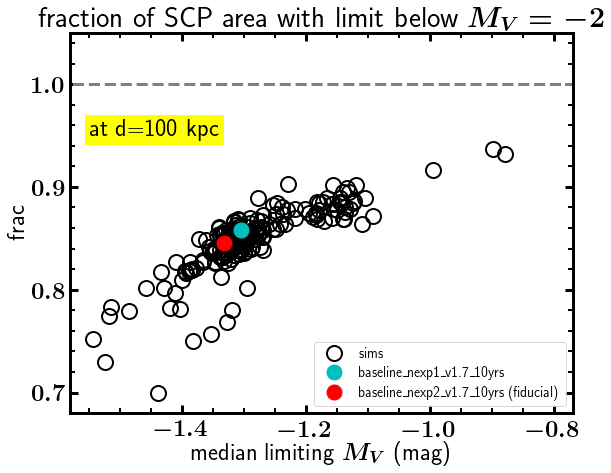

In [29]:
params = {
   'axes.labelsize': 24,
   'font.size': 24,
   'legend.fontsize': 14,
#   'xtick.labelsize': 16,
   'xtick.major.width': 3,
   'xtick.minor.width': 2,
   'xtick.major.size': 8,
   'xtick.minor.size': 5,
   'xtick.direction': 'in',
   'xtick.top': True,
   'lines.linewidth':3,
   'axes.linewidth':3,
   'axes.labelweight':3,
   'axes.titleweight':3,
   'ytick.major.width':3,
   'ytick.minor.width':2,
   'ytick.major.size': 8,
   'ytick.minor.size': 5,
   'ytick.direction': 'in',
   'ytick.right': True,
#   'ytick.labelsize': 20,
   'text.usetex': True,
   'text.latex.preamble': r'\boldmath',
   'figure.figsize': [9, 7],
   'figure.facecolor': 'White'
   }

plt.rcParams.update(params)

#plt.plot(nbelow_mv7, 'k.')
#plt.plot(nbelow_mv7, 'k')
#plt.plot(mv_medians, nbelow_mv7, 'k.')
plt.hlines(1.0, -3.5, 0, linestyle='--', color='Gray')
#plt.xlim(-3.2, -1.2) # for 300 kpc
plt.xlim(-1.58, -0.77) # for 100 kpc 
plt.plot(mv_medians, fracbelow_mv3, 'ko', ms=15, fillstyle='none', markeredgewidth=2, label='sims')
plt.plot(mv_medians[fiducial1[0][0]], fracbelow_mv3[fiducial1[0][0]], 'co', ms=15, label='baseline\_nexp1\_v1.7\_10yrs')
plt.plot(mv_medians[fiducial2[0][0]], fracbelow_mv3[fiducial2[0][0]], 'ro', ms=15, label='baseline\_nexp2\_v1.7\_10yrs (fiducial)')
#plt.plot(mv_medians, fracbelow_mv3/fracbelow_mv3[fiducial2[0][0]], 'ko', ms=15, fillstyle='none', markeredgewidth=2, label='sims')
#plt.plot(mv_medians[fiducial1[0][0]], fracbelow_mv3[fiducial1[0][0]]/fracbelow_mv3[fiducial2[0][0]], 'co', ms=15, label='baseline\_nexp1\_v1.7\_10yrs')
#plt.plot(mv_medians[fiducial2[0][0]], fracbelow_mv3[fiducial2[0][0]]/fracbelow_mv3[fiducial2[0][0]], 'ro', ms=15, label='baseline\_nexp2\_v1.7\_10yrs (fiducial)')
plt.legend(loc='lower right')
plt.xlabel('median limiting $M_V$ (mag)')
# plt.ylabel('A/A$_{fiducial}$')
plt.ylabel('frac')
plt.title('fraction of SCP area with limit below $M_V = -2$')
#plt.text(-3.1, 0.9, 'at d=300 kpc', backgroundcolor='Yellow')
plt.text(-1.55, 0.95, 'at d=100 kpc', backgroundcolor='Yellow')
plt.ylim(0.68, 1.05) # for 100 kpc
#plt.ylim(0, 1.05) # for 300 kpc
plt.minorticks_on()
plt.savefig('fracarea_100kpc_mv_gt_minus2_vs_mv_limit_SCP_nside32_all200sims.png')
#plt.savefig('fracarea_300kpc_mv_gt_minus2_vs_mv_limit_SCP_nside32_all200sims.png')
plt.show()

In [36]:
np.sum(np.abs(mv_medians) < 10)

200

In [30]:
from astropy.table import Table

tab = Table([names, mv_medians, sbv_medians, fracbelow_mv3], names=['sim', 'mv_lim', 'sbv_lim', 'fracbelow_mv2'])

In [31]:
# tab.write('scp_sims_compare_100kpc_nside32_all200sims.fits', overwrite=True)

In [22]:
plt.text?

Signature: plt.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    backgroundcolor: color
    bbox: dict with properties for `.patches.FancyBboxPatch`
    clip_box: `.Bb